In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('D:\Datasets\car_evaluation.csv')

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.shape

(1727, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
cols=['buying','maint_cost','doors','persons','lug_boot','safety','class']

In [9]:
df.columns=cols

In [10]:
df.head()

,buying,maint_cost,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   buying      1727 non-null   object
 1   maint_cost  1727 non-null   object
 2   doors       1727 non-null   object
 3   persons     1727 non-null   object
 4   lug_boot    1727 non-null   object
 5   safety      1727 non-null   object
 6   class       1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
df.isnull().sum()

buying        0
maint_cost    0
doors         0
persons       0
lug_boot      0
safety        0
class         0
dtype: int64

In [13]:
df.buying.value_counts()

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64

In [14]:
for i in cols:
    print(df[i].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint_cost, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [ ]:
#create a countplot for class

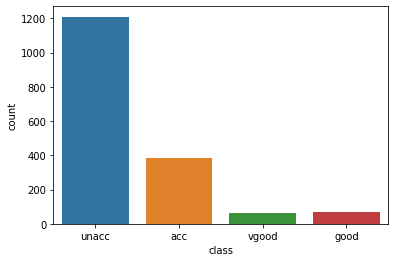

In [15]:
sns.countplot(x=df['class'])
plt.show()

In [16]:
#create the feature vector and the target variable
x=df.drop(['class'],axis=1)
y=df['class']

In [17]:
x.head()

,buying,maint_cost,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [18]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [ ]:
#train test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [21]:
x_train.shape

(1381, 6)

In [22]:
x_test.shape

(346, 6)

In [23]:
y_test.shape

(346,)

In [24]:
!pip install category-encoders

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [26]:
import category_encoders as ce

In [32]:
cols1=['buying', 'maint_cost', 'doors', 'persons', 'lug_boot',
                     'safety']

In [33]:
encoder=ce.OrdinalEncoder(cols=cols1)

In [34]:
print(encoder)

OrdinalEncoder(cols=['buying', 'maint_cost', 'doors', 'persons', 'lug_boot',
                     'safety'])


In [35]:
x_train.head()

,buying,maint_cost,doors,persons,lug_boot,safety
107,vhigh,high,2,2,small,low
900,med,vhigh,3,4,small,med
1708,low,low,5more,2,big,high
705,high,med,4,2,med,med
678,high,med,3,2,med,med


In [36]:
x_train=encoder.fit_transform(x_train)

C:\Users\HP\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [37]:
x_train.head()

,buying,maint_cost,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


In [38]:
x_test=encoder.fit_transform(x_test)

C:\Users\HP\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [39]:
x_test.head()

,buying,maint_cost,doors,persons,lug_boot,safety
599,4,1,4,1,2,1
932,2,2,4,2,2,1
628,4,1,3,1,2,3
1497,3,1,3,2,3,2
1262,2,3,4,3,3,1


In [40]:
#Decision tree classifier with gini index criterion

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
#instantiate the DecisionTreeClassifier with criterion gini index
dtc_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)


In [43]:
dtc_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [44]:
#predict 
y_pred_gini=dtc_gini.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score

In [47]:
print('The model accuracy with gini index criterion is',accuracy_score(y_test,y_pred_gini))

The model accuracy with gini index criterion is 0.7687861271676301


In [ ]:
#change max depth to 4 and find the accuracy

In [49]:
#check for overfitting and underfitting
print('Training accuracy for gini is',dtc_gini.score(x_train,y_train))

Training accuracy for gini is 0.7921795800144823


In [50]:
print('Testing accuracy for gini is',dtc_gini.score(x_test,y_test))

Testing accuracy for gini is 0.7687861271676301


In [ ]:
#conclusion-since the training and testing accuracy are close to each other,
#there is no overfitting

In [52]:
'''check for overfitting with depth=4'''

'check for overfitting with depth=4'

In [53]:
dtc_gini=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
dtc_gini.fit(x_train,y_train)
y_pred_gini=dtc_gini.predict(x_test)
print('The model accuracy with gini index criterion is',accuracy_score(y_test,y_pred_gini))
print('Training accuracy for gini is',dtc_gini.score(x_train,y_train))
print('Testing accuracy for gini is',dtc_gini.score(x_test,y_test))

The model accuracy with gini index criterion is 0.8352601156069365
Training accuracy for gini is 0.832729905865315
Testing accuracy for gini is 0.8352601156069365


In [54]:
'''check for overfitting with depth=5'''
dtc_gini=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=0)
dtc_gini.fit(x_train,y_train)
y_pred_gini=dtc_gini.predict(x_test)
print('The model accuracy with gini index criterion is',accuracy_score(y_test,y_pred_gini))
print('Training accuracy for gini is',dtc_gini.score(x_train,y_train))
print('Testing accuracy for gini is',dtc_gini.score(x_test,y_test))

The model accuracy with gini index criterion is 0.8583815028901735
Training accuracy for gini is 0.8515568428674873
Testing accuracy for gini is 0.8583815028901735


In [58]:
'''check for overfitting with depth=10'''
dtc_gini=DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=0)
dtc_gini.fit(x_train,y_train)
y_pred_gini=dtc_gini.predict(x_test)
print('The model accuracy with gini index criterion is',accuracy_score(y_test,y_pred_gini))
print('Training accuracy for gini is',dtc_gini.score(x_train,y_train))
print('Testing accuracy for gini is',dtc_gini.score(x_test,y_test))

The model accuracy with gini index criterion is 0.9566473988439307
Training accuracy for gini is 0.9913106444605359
Testing accuracy for gini is 0.9566473988439307


In [59]:
#tree with depth 4
dtc_gini=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
dtc_gini.fit(x_train,y_train)
y_pred_gini=dtc_gini.predict(x_test)
print('The model accuracy with gini index criterion is',accuracy_score(y_test,y_pred_gini))
print('Training accuracy for gini is',dtc_gini.score(x_train,y_train))
print('Testing accuracy for gini is',dtc_gini.score(x_test,y_test))

The model accuracy with gini index criterion is 0.8352601156069365
Training accuracy for gini is 0.832729905865315
Testing accuracy for gini is 0.8352601156069365


[Text(0.25, 0.9, 'X[5] <= 1.5\ngini = 0.452\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(0.375, 0.7, 'X[3] <= 1.5\ngini = 0.576\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(0.5, 0.5, 'X[1] <= 2.5\ngini = 0.625\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(0.25, 0.3, 'X[0] <= 1.5\ngini = 0.523\nsamples = 301\nvalue = [136, 0, 157, 8]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 77\nvalue = [0, 0, 77, 0]'),
 Text(0.375, 0.1, 'gini = 0.503\nsamples = 224\nvalue = [136, 0, 80, 8]'),
 Text(0.75, 0.3, 'X[0] <= 3.5\ngini = 0.633\nsamples = 314\nvalue = [171, 54, 49, 40]'),
 Text(0.625, 0.1, 'gini = 0.678\nsamples = 229\nvalue = [108, 54, 27, 40]'),
 Text(0.875, 0.1, 'gini = 0.384\nsamples = 85\nvalue = [63, 0, 22, 0]')]

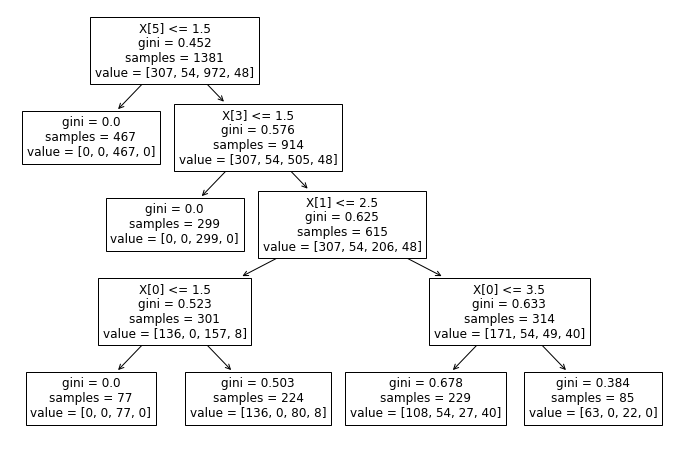

In [60]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dtc_gini.fit(x_train,y_train))

The model accuracy with gini index criterion is 0.8583815028901735
Training accuracy for gini is 0.8515568428674873
Testing accuracy for gini is 0.8583815028901735


[Text(0.2692307692307692, 0.9166666666666666, 'X[5] <= 1.5\ngini = 0.452\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(0.19230769230769232, 0.75, 'gini = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(0.34615384615384615, 0.75, 'X[3] <= 1.5\ngini = 0.576\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(0.2692307692307692, 0.5833333333333334, 'gini = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(0.4230769230769231, 0.5833333333333334, 'X[1] <= 2.5\ngini = 0.625\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[0] <= 1.5\ngini = 0.523\nsamples = 301\nvalue = [136, 0, 157, 8]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 77\nvalue = [0, 0, 77, 0]'),
 Text(0.23076923076923078, 0.25, 'X[0] <= 3.5\ngini = 0.503\nsamples = 224\nvalue = [136, 0, 80, 8]'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 0.431\nsamples = 148\nvalue = [106, 0, 34, 8]'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.

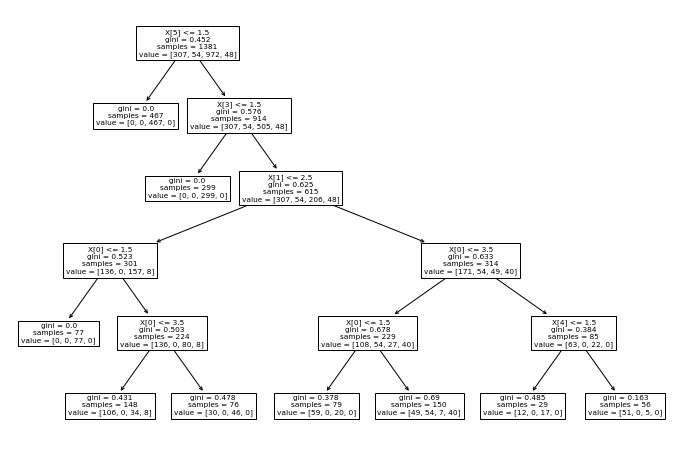

In [63]:
#tree with depth 5
dtc_gini=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=0)
dtc_gini.fit(x_train,y_train)
y_pred_gini=dtc_gini.predict(x_test)
print('The model accuracy with gini index criterion is',accuracy_score(y_test,y_pred_gini))
print('Training accuracy for gini is',dtc_gini.score(x_train,y_train))
print('Testing accuracy for gini is',dtc_gini.score(x_test,y_test))
plt.figure(figsize=(12,8))
tree.plot_tree(dtc_gini.fit(x_train,y_train))

In [ ]:
'''Decision tree classifier with entropy/information gain criterion'''

In [64]:
#instantiate the decision tree classifier with entropy criterion
dtc_ent=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

In [65]:
#fit the model
dtc_ent.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [69]:
#predict the test results
y_pred_ent=dtc_ent.predict(x_test)

In [70]:
print('Model accuracy is',accuracy_score(y_test,y_pred_ent))

Model accuracy is 0.7687861271676301


In [ ]:
'''compare training and testing accuracy to check overfitting'''

In [71]:
print('Training accuracy',dtc_ent.score(x_train,y_train))
print('Testing accuracy',dtc_ent.score(x_test,y_test))

Training accuracy 0.7921795800144823
Testing accuracy 0.7687861271676301


In [ ]:
'''since the training and testing accuracies are comparable, the model is not
overfitted or underfitted'''

In [72]:
#depth=4
dtc_ent=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=0)
dtc_ent.fit(x_train,y_train)
y_pred_ent=dtc_ent.predict(x_test)
print('Model accuracy is',accuracy_score(y_test,y_pred_ent))
print('Training accuracy',dtc_ent.score(x_train,y_train))
print('Testing accuracy',dtc_ent.score(x_test,y_test))

Model accuracy is 0.8352601156069365
Training accuracy 0.832729905865315
Testing accuracy 0.8352601156069365


In [ ]:
'''training (fit) evaluation (test)-make changes in the parameters, 
prediction/testing (y_pred)'''

In [73]:
#depth=6
dtc_ent=DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=0)
dtc_ent.fit(x_train,y_train)
y_pred_ent=dtc_ent.predict(x_test)
print('Model accuracy is',accuracy_score(y_test,y_pred_ent))
print('Training accuracy',dtc_ent.score(x_train,y_train))
print('Testing accuracy',dtc_ent.score(x_test,y_test))

Model accuracy is 0.884393063583815
Training accuracy 0.8812454742939899
Testing accuracy 0.884393063583815


Model accuracy is 0.8352601156069365
Training accuracy 0.832729905865315
Testing accuracy 0.8352601156069365


[Text(0.25, 0.9, 'X[5] <= 1.5\nentropy = 1.19\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(0.125, 0.7, 'entropy = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(0.375, 0.7, 'X[3] <= 1.5\nentropy = 1.466\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(0.25, 0.5, 'entropy = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(0.5, 0.5, 'X[1] <= 2.5\nentropy = 1.624\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(0.25, 0.3, 'X[0] <= 1.5\nentropy = 1.147\nsamples = 301\nvalue = [136, 0, 157, 8]'),
 Text(0.125, 0.1, 'entropy = 0.0\nsamples = 77\nvalue = [0, 0, 77, 0]'),
 Text(0.375, 0.1, 'entropy = 1.139\nsamples = 224\nvalue = [136, 0, 80, 8]'),
 Text(0.75, 0.3, 'X[5] <= 2.5\nentropy = 1.711\nsamples = 314\nvalue = [171, 54, 49, 40]'),
 Text(0.625, 0.1, 'entropy = 1.456\nsamples = 162\nvalue = [87, 34, 41, 0]'),
 Text(0.875, 0.1, 'entropy = 1.588\nsamples = 152\nvalue = [84, 20, 8, 40]')]

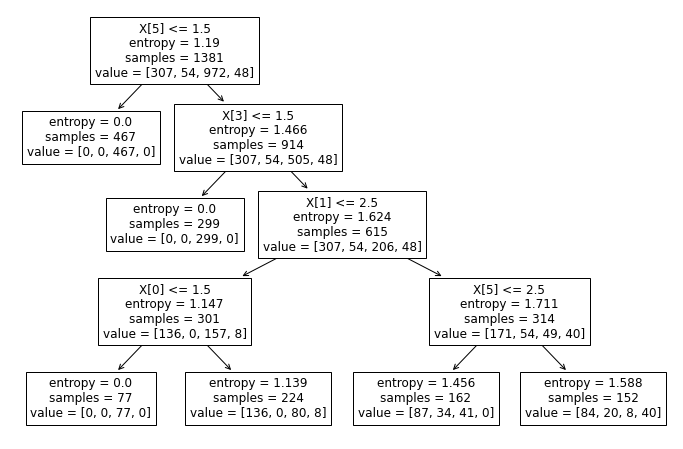

In [75]:
#Visualize decision tree
#depth=4
dtc_ent=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=0)
dtc_ent.fit(x_train,y_train)
y_pred_ent=dtc_ent.predict(x_test)
print('Model accuracy is',accuracy_score(y_test,y_pred_ent))
print('Training accuracy',dtc_ent.score(x_train,y_train))
print('Testing accuracy',dtc_ent.score(x_test,y_test))

plt.figure(figsize=(12,8))
tree.plot_tree(dtc_ent.fit(x_train,y_train))

Model accuracy is 0.7687861271676301
Training accuracy 0.7921795800144823
Testing accuracy 0.7687861271676301


[Text(0.3333333333333333, 0.875, 'X[5] <= 1.5\nentropy = 1.19\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\nentropy = 1.466\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(0.6666666666666666, 0.375, 'X[1] <= 2.5\nentropy = 1.624\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(0.5, 0.125, 'entropy = 1.147\nsamples = 301\nvalue = [136, 0, 157, 8]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.711\nsamples = 314\nvalue = [171, 54, 49, 40]')]

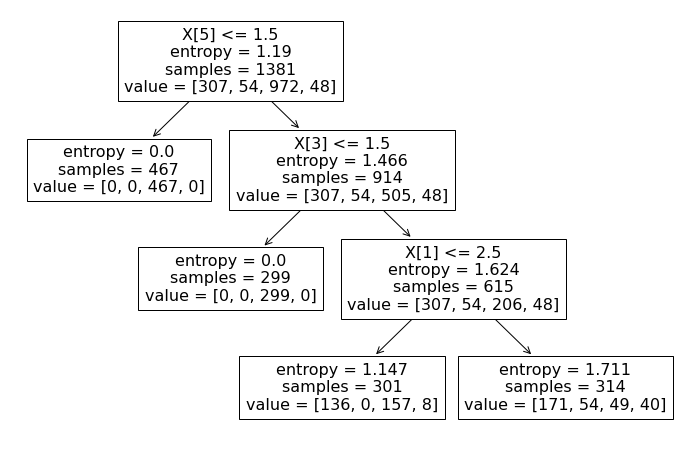

In [76]:
#depth=3
dtc_ent=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
dtc_ent.fit(x_train,y_train)
y_pred_ent=dtc_ent.predict(x_test)
print('Model accuracy is',accuracy_score(y_test,y_pred_ent))
print('Training accuracy',dtc_ent.score(x_train,y_train))
print('Testing accuracy',dtc_ent.score(x_test,y_test))

plt.figure(figsize=(12,8))
tree.plot_tree(dtc_ent.fit(x_train,y_train))

In [78]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_ent)
print('Confusion Matrix\n',cm)

Confusion Matrix
 [[ 36   0  41   0]
 [ 15   0   0   0]
 [  7   0 230   0]
 [ 12   0   5   0]]


In [79]:
#depth=6
dtc_ent=DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=0)
dtc_ent.fit(x_train,y_train)
y_pred_ent=dtc_ent.predict(x_test)
print('Model accuracy is',accuracy_score(y_test,y_pred_ent))
print('Training accuracy',dtc_ent.score(x_train,y_train))
print('Testing accuracy',dtc_ent.score(x_test,y_test))

cm=confusion_matrix(y_test,y_pred_ent)
print('Confusion Matrix\n',cm)

Model accuracy is 0.884393063583815
Training accuracy 0.8812454742939899
Testing accuracy 0.884393063583815
Confusion Matrix
 [[ 70   0   1   6]
 [  9   0   0   6]
 [ 13   0 224   0]
 [  5   0   0  12]]


In [80]:
#tree with depth 4
dtc_gini=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
dtc_gini.fit(x_train,y_train)
y_pred_gini=dtc_gini.predict(x_test)
print('The model accuracy with gini index criterion is',accuracy_score(y_test,y_pred_gini))
print('Training accuracy for gini is',dtc_gini.score(x_train,y_train))
print('Testing accuracy for gini is',dtc_gini.score(x_test,y_test))
cm=confusion_matrix(y_test,y_pred_gini)
print('Confusion Matrix\n',cm)

The model accuracy with gini index criterion is 0.8352601156069365
Training accuracy for gini is 0.832729905865315
Testing accuracy for gini is 0.8352601156069365
Confusion Matrix
 [[ 77   0   0   0]
 [ 15   0   0   0]
 [ 25   0 212   0]
 [ 17   0   0   0]]


In [81]:
#tree with depth 6
dtc_gini=DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=0)
dtc_gini.fit(x_train,y_train)
y_pred_gini=dtc_gini.predict(x_test)
print('The model accuracy with gini index criterion is',accuracy_score(y_test,y_pred_gini))
print('Training accuracy for gini is',dtc_gini.score(x_train,y_train))
print('Testing accuracy for gini is',dtc_gini.score(x_test,y_test))
cm=confusion_matrix(y_test,y_pred_gini)
print('Confusion Matrix\n',cm)

The model accuracy with gini index criterion is 0.8930635838150289
Training accuracy for gini is 0.8979000724112962
Testing accuracy for gini is 0.8930635838150289
Confusion Matrix
 [[ 70   0   3   4]
 [  5   0   0  10]
 [ 10   0 227   0]
 [  5   0   0  12]]


In [111]:
df=pd.read_csv(r'D:\Datasets\creditcard_clean.csv')

In [112]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [113]:
df.shape

(690, 16)

In [114]:
x=df.drop(['Approved'],axis=1)
y=df['Approved']

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [116]:
x_train.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
278,1,24.58,13.500,0,0,Healthcare,Latino,0.000,0,0,0,0,ByBirth,0,0
110,1,29.17,3.500,1,1,Industrials,White,3.500,1,1,3,1,ByBirth,329,0
82,1,39.83,0.500,1,1,CommunicationServices,White,0.250,1,0,0,0,ByOtherMeans,288,0
51,1,26.00,1.000,1,1,Materials,White,1.750,1,0,0,1,ByBirth,280,0
218,1,53.92,9.625,1,1,Education,White,8.665,1,1,5,0,ByBirth,0,0


In [117]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 278 to 102
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          552 non-null    int64  
 1   Age             552 non-null    float64
 2   Debt            552 non-null    float64
 3   Married         552 non-null    int64  
 4   BankCustomer    552 non-null    int64  
 5   Industry        552 non-null    object 
 6   Ethnicity       552 non-null    object 
 7   YearsEmployed   552 non-null    float64
 8   PriorDefault    552 non-null    int64  
 9   Employed        552 non-null    int64  
 10  CreditScore     552 non-null    int64  
 11  DriversLicense  552 non-null    int64  
 12  Citizen         552 non-null    object 
 13  ZipCode         552 non-null    int64  
 14  Income          552 non-null    int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 69.0+ KB


In [118]:
c=['Industry','Ethnicity','Citizen']

In [119]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in c:
    x_train[i]=label_encoder.fit_transform(x_train[i])
    x_test[i]=label_encoder.fit_transform(x_test[i])

In [120]:
x_train.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
278,1,24.58,13.500,0,0,6,2,0.000,0,0,0,0,0,0,0
110,1,29.17,3.500,1,1,7,4,3.500,1,1,3,1,0,329,0
82,1,39.83,0.500,1,1,0,4,0.250,1,0,0,0,1,288,0
51,1,26.00,1.000,1,1,9,4,1.750,1,0,0,1,0,280,0
218,1,53.92,9.625,1,1,3,4,8.665,1,1,5,0,0,0,0


In [121]:
x_test.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
286,0,28.46,1.5,1,1,6,2,0.0,0,1,2,1,0,200,105
511,0,46.00,4.0,1,1,11,3,0.0,1,0,0,0,0,100,960
257,1,20.00,0.0,1,1,10,4,0.5,0,0,0,0,0,144,0
336,1,47.33,6.5,1,1,4,4,1.0,0,0,0,1,0,0,228
318,1,19.17,0.0,0,0,0,0,0.0,0,0,0,1,1,500,1


In [123]:
#depth=4
dtc_ent=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=0)
dtc_ent.fit(x_train,y_train)
y_pred=dtc_ent.predict(x_test)
print('Model accuracy is',accuracy_score(y_test,y_pred))
print('Training accuracy',dtc_ent.score(x_train,y_train))
print('Testing accuracy',dtc_ent.score(x_test,y_test))

Model accuracy is 0.7753623188405797
Training accuracy 0.8731884057971014
Testing accuracy 0.7753623188405797


In [124]:
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n',cm)

Confusion Matrix
 [[63  5]
 [26 44]]


In [125]:
#depth=5
dtc_ent=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
dtc_ent.fit(x_train,y_train)
y_pred=dtc_ent.predict(x_test)
print('Model accuracy is',accuracy_score(y_test,y_pred))
print('Training accuracy',dtc_ent.score(x_train,y_train))
print('Testing accuracy',dtc_ent.score(x_test,y_test))
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n',cm)

Model accuracy is 0.782608695652174
Training accuracy 0.8858695652173914
Testing accuracy 0.782608695652174
Confusion Matrix
 [[62  6]
 [24 46]]
